# Info
: 거래 가격 상승과 하락이 일어난 주를 나누어 그때의 title을 따로 분석하여 빈도가 가장 높은단어 그리고 tf-idf값이 높은 단어를 구하기 위한 코드이다.

In [2]:
import pandas as pd

tf_idf = pd.read_pickle('../article/tf_idf.pkl')

In [3]:
tf_idf = tf_idf.transpose()
tf_idf

,0,1,2,3,4,5,6,7,8,9,...,798,799,800,801,802,803,804,805,806,807
취득세,5.077630,0.000000,0.000000,0.000000,5.077630,0.000000,0.000000,0.000000,5.077630,0.000000,...,5.077630,25.388149,0.000000,0.000000,15.232889,10.155260,10.155260,0.000000,55.853928,5.077630
인하,4.387767,13.163300,4.387767,4.387767,17.551067,8.775533,4.387767,17.551067,13.163300,13.163300,...,13.163300,30.714367,4.387767,8.775533,17.551067,26.326600,17.551067,0.000000,4.387767,0.000000
양도세,48.994673,17.816245,22.270306,44.540612,13.362183,8.908122,8.908122,0.000000,26.724367,8.908122,...,35.632489,22.270306,31.178428,80.173101,71.264978,89.081223,396.411443,40.086550,80.173101,35.632489
부담,8.490867,4.245434,12.736301,4.245434,29.718036,4.245434,0.000000,8.490867,12.736301,4.245434,...,42.454337,67.926939,101.890409,33.963470,16.981735,50.945204,42.454337,21.227169,33.963470,21.227169
하반기,8.508059,0.000000,4.254030,4.254030,4.254030,4.254030,38.286268,25.524178,0.000000,0.000000,...,4.254030,42.540297,25.524178,21.270149,8.508059,38.286268,38.286268,29.778208,127.620892,221.209547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
수파,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.797942
열독,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.797942
팔곡,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.797942
서선,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.797942


In [4]:
tf_idf_descend = {}

week = 808

for w in range(week):
    week_word_desc = list(tf_idf[w].sort_values(ascending = False).index)
    tf_idf_descend[w] = week_word_desc

tf_idf_descend = pd.DataFrame(tf_idf_descend)

In [5]:
tf_idf_descend.to_pickle('../article/tf_idf_descend.pkl')

TF-IDF를 이용한 keyword 추출1
- TF-IDF 값이 높은 단어 n개를 이용

In [6]:
case_index_df = pd.read_pickle("../seoul_apt_trade_data/case_index_df.pkl")
case_index_df

,case1,case2,case3,case4,case5,case6,case7,case8,uprate,uprate_avg
강남구,"[6, 7, 34, 36, 39, 46, 47, 66, 85, 95, 96, 101...","[5, 14, 22, 26, 35, 37, 38, 42, 55, 64, 65, 72...","[2, 8, 10, 15, 18, 20, 23, 27, 30, 32, 40, 43,...","[12, 24, 44, 49, 53, 70, 76, 90, 103, 113, 124...","[1, 4, 9, 13, 17, 19, 21, 25, 29, 31, 33, 41, ...","[3, 11, 16, 28, 50, 59, 62, 79, 106, 118, 135,...","[2, 5, 6, 7, 8, 10, 14, 15, 18, 20, 22, 23, 26...","[1, 3, 4, 9, 11, 12, 13, 16, 17, 19, 21, 24, 2...","[-0.1317061309257776, 0.0755196433630375, -0.0...",0.000940
강동구,"[7, 27, 30, 34, 36, 40, 46, 65, 68, 73, 74, 83...","[6, 8, 33, 35, 37, 79, 86, 101, 103, 107, 112,...","[4, 9, 13, 15, 20, 23, 28, 31, 38, 41, 47, 55,...","[1, 10, 16, 21, 24, 44, 76, 98, 99, 122, 142, ...","[3, 5, 12, 14, 19, 22, 26, 29, 32, 39, 45, 54,...","[2, 11, 17, 18, 25, 42, 43, 48, 49, 50, 51, 52...","[4, 6, 7, 8, 9, 13, 15, 20, 23, 27, 28, 30, 31...","[1, 2, 3, 5, 10, 11, 12, 14, 16, 17, 18, 19, 2...","[-0.08053120090945218, -0.0677587035592929, -0...",0.000967
강서구,"[10, 25, 28, 36, 114, 115, 116, 119, 121, 147,...","[7, 22, 35, 40, 41, 42, 55, 70, 74, 87, 96, 11...","[2, 4, 8, 11, 15, 19, 23, 26, 29, 32, 37, 43, ...","[5, 12, 17, 20, 48, 52, 59, 63, 72, 90, 110, 1...","[1, 3, 6, 9, 14, 18, 21, 24, 27, 31, 34, 39, 4...","[13, 16, 30, 33, 38, 51, 53, 60, 68, 89, 91, 9...","[2, 4, 7, 8, 10, 11, 15, 19, 22, 23, 25, 26, 2...","[1, 3, 5, 6, 9, 12, 13, 14, 16, 17, 18, 20, 21...","[-0.010000817878349852, 0.01732253050087575, -...",0.001657
강북구,"[28, 35, 43, 46, 49, 58, 117, 118, 121, 134, 1...","[23, 36, 55, 84, 87, 110, 111, 150, 159, 170, ...","[2, 6, 9, 13, 16, 19, 21, 24, 26, 29, 31, 33, ...","[3, 11, 14, 17, 53, 74, 96, 99, 127, 137, 138,...","[1, 5, 8, 12, 15, 18, 20, 22, 25, 27, 30, 32, ...","[4, 7, 10, 60, 69, 79, 82, 89, 100, 103, 108, ...","[2, 6, 9, 13, 16, 19, 21, 23, 24, 26, 28, 29, ...","[1, 3, 4, 5, 7, 8, 10, 11, 12, 14, 15, 17, 18,...","[-0.07770145846522913, 0.20140240074962582, -0...",0.001778
관악구,"[4, 8, 9, 30, 37, 48, 51, 74, 84, 86, 90, 99, ...","[7, 29, 41, 60, 81, 85, 87, 95, 96, 100, 105, ...","[2, 5, 10, 13, 15, 21, 24, 26, 31, 33, 38, 42,...","[16, 19, 22, 34, 44, 63, 79, 115, 123, 126, 14...","[1, 3, 6, 12, 14, 20, 23, 25, 28, 32, 36, 40, ...","[11, 17, 18, 27, 35, 39, 43, 62, 68, 76, 107, ...","[2, 4, 5, 7, 8, 9, 10, 13, 15, 21, 24, 26, 29,...","[1, 3, 6, 11, 12, 14, 16, 17, 18, 19, 20, 22, ...","[-0.0919116003001974, 0.034083617785010206, -0...",0.001401
광진구,"[3, 8, 28, 38, 65, 66, 71, 74, 102, 147, 182, ...","[2, 15, 37, 47, 60, 87, 97, 110, 116, 136, 139...","[4, 6, 9, 11, 16, 18, 20, 23, 26, 29, 31, 33, ...","[12, 24, 49, 53, 80, 91, 107, 108, 126, 129, 1...","[1, 5, 7, 10, 14, 17, 19, 22, 25, 27, 30, 32, ...","[13, 21, 50, 56, 85, 106, 114, 134, 143, 153, ...","[2, 3, 4, 6, 8, 9, 11, 15, 16, 18, 20, 23, 26,...","[1, 5, 7, 10, 12, 13, 14, 17, 19, 21, 22, 24, ...","[-0.0733592452022878, 0.06075941983879273, 0.0...",0.001197
구로구,"[24, 56, 57, 59, 66, 74, 84, 87, 110, 117, 118...","[4, 10, 38, 45, 58, 67, 71, 99, 100, 114, 123,...","[2, 5, 7, 11, 13, 17, 22, 25, 27, 29, 31, 36, ...","[8, 33, 77, 82, 106, 112, 132, 142, 151, 187, ...","[1, 3, 6, 9, 12, 16, 21, 23, 26, 28, 30, 35, 3...","[14, 15, 18, 19, 20, 32, 34, 42, 43, 61, 64, 6...","[2, 4, 5, 7, 10, 11, 13, 17, 22, 24, 25, 27, 2...","[1, 3, 6, 8, 9, 12, 14, 15, 16, 18, 19, 20, 21...","[-0.0774455958603197, 0.06116043226670311, -0....",0.001159
금천구,"[16, 36, 38, 47, 87, 98, 99, 101, 107, 112, 12...","[7, 10, 23, 30, 37, 39, 51, 63, 64, 65, 79, 82...","[2, 8, 11, 13, 17, 19, 24, 26, 28, 31, 33, 40,...","[4, 34, 41, 45, 49, 55, 95, 96, 139, 140, 145,...","[1, 6, 9, 12, 15, 18, 22, 25, 27, 29, 32, 35, ...","[3, 5, 14, 20, 21, 42, 56, 59, 69, 72, 77, 105...","[2, 7, 8, 10, 11, 13, 16, 17, 19, 23, 24, 26, ...","[1, 3, 4, 5, 6, 9, 12, 14, 15, 18, 20, 21, 22,...","[-0.024772337653797938, 0.052399700122267114, ...",0.001708
노원구,"[5, 21, 31, 38, 48, 49, 51, 55, 60, 61, 64, 10...","[4, 17, 22, 26, 29, 30, 37, 

In [7]:
gu_name = ['강남구','강동구','강서구','강북구','관악구','광진구','구로구','금천구',
          '노원구','동대문구','도봉구','동작구','마포구','서대문구','성동구','성북구',
          '서초구','송파구','영등포구','용산구','양천구','은평구','종로구','중구','중랑구']

In [8]:
tf_idf_descend

,0,1,2,3,4,5,6,7,8,9,...,798,799,800,801,802,803,804,805,806,807
0,부동산,분양,분양,판교,재건축,판교,아파트,분양,분양,분양,...,부동산,억,노형욱,아파트,아파트,주택,부동산,아파트,분양,아파트
1,아파트,도시,아파트,분양,아파트,분양,분양,아파트,아파트,아파트,...,아파트,아파트,아파트,분양,부동산,분양,아파트,분양,아파트,분양
2,분양,만,판교,아파트,주택,아파트,거래,롯데월드,판교,판교,...,분양,주택,주택,주택,주택,아파트,주택,주택,주택,주택
3,도시,아파트,재건축,부동산,분양,청약,재건축,판교,부동산,만,...,주택,서울,부동산,억,노형욱,부동산,서울,억,부동산,서울
4,시장,판교,만,청약,부동산,주택,부동산,주택,만,평,...,건설,부동산,분양,부동산,서울,개발,억,노형욱,서울,억
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48915,혼재,한국일보사,파란만장,승차권,올드,장맛,히어로,이용걸,자네,서울남산체,...,봉화,견해,합부,더페이스샵,올가을,예비군,김종률,체중,강호치,宗家
48916,구제법,협곡,승하차,스태그플레이션,장맛,울산역,발매,계승,유철준,히어로,...,북서울,태원,동세,설자리,무풍,훈련장,아이리스,이치엔,예산서,지에
48917,홍제천,성규,구암역,문기학,울산역,애들레이드,조호바,줄리아니,견만,발매,...,스투닷컴,선급금,박희태,석수역,고천동,징계,직할시,뻘,김정권,비어
48918,유방동,복어,최장현,괴산군,애들레이드,인천국제공항공사,공사판,슬램,세신,조호바,...,송광호,기때,갈지자,축수,방종,너지,타요,기근,스티로폼,윤석경


주간 TF-IDF 키워드

In [9]:
from collections import Counter

word_extract_dict = {}

for gu in gu_name:
    gu_dict = {}
    for i in range(1,9):
        word_list = []
        case = f'case{i}'
        index_list = case_index_df.loc[gu,case]
        for w in index_list:
            word_list += list(tf_idf_descend.iloc[:200,w])
        gu_dict[case] = word_list
    word_extract_dict[gu] = gu_dict

In [10]:
word_extract_df = pd.DataFrame(word_extract_dict)
word_extract_df

,강남구,강동구,강서구,강북구,관악구,광진구,구로구,금천구,노원구,동대문구,...,성북구,서초구,송파구,영등포구,용산구,양천구,은평구,종로구,중구,중랑구
case1,"[아파트, 분양, 거래, 재건축, 부동산, 판교, 평, 도시, 강남, 개발, 신고,...","[분양, 아파트, 롯데월드, 판교, 주택, 재건축, 개발, 층, 부동산, 만, 생애...","[판교, 아파트, 분양, 만, 강남, 원, 평, 청약, 가구, 공시, 주택, 최고,...","[아파트, 분양, 만, 도시, 재건축, 개발, 평, 부동산, 판교, 담합, 주택, ...","[재건축, 아파트, 주택, 분양, 부동산, 판교, 개발, 강남, 청약, 단독, 만,...","[판교, 분양, 아파트, 부동산, 청약, 월, 만, 재건축, 대책, 주택, 평, 도...","[분양, 부동산, 아파트, 가구, 만, 도시, 개발, 주택, 하반기, 서울, 판교,...","[분양, 아파트, 주택, 부동산, 억, 판교, 재건축, 가구, 복합, 원, 강남, ...","[판교, 분양, 아파트, 청약, 주택, 원, 만, 평, 가구, 재건축, 강남, 부동...","[판교, 분양, 청약, 아파트, 만, 평, 원, 강남, 부동산, 도시, 임대, 주공...",...,"[분양, 아파트, 판교, 재건축, 만, 부동산, 평, 원, 개발, 도시, 주택, 서...","[판교, 분양, 중대, 아파트, 청약, 대, 서울, 만, 도시, 주택, 경쟁, 부동...","[부동산, 버블, 거품, 분양, 아파트, 집값, 강남, 판교, 붕괴, 주택, 계약,...","[부동산, 분양, 아파트, 정책, 개발, 재건축, 주택, 도시, 일, 월, 지구, ...","[판교, 아파트, 분양, 만, 강남, 원, 평, 청약, 가구, 공시, 주택, 최고,...","[분양, 판교, 아파트, 청약, 부담금, 만, 대, 재건축, 기반, 가구, 개발, ...","[분양, 판교, 아파트, 청약, 부담금, 만, 대, 재건축, 기반, 가구, 개발, ...","[재건축, 아파트, 주택, 분양, 부동산, 판교, 개발, 강남, 청약, 단독, 만,...","[분양, 판교, 아파트, 부동산, 대, 가구, 강남, 만, 재건축, 개발, 평, 원...","[분양, 판교, 아파트, 부동산, 대, 가구, 강남, 만, 재건축, 개발, 평, 원..."
case2,"[판교, 분양, 아파트, 청약, 주택, 원, 만, 평, 가구, 재건축, 강남, 부동...","[아파트, 분양, 거래, 재건축, 부동산, 판교, 평, 도시, 강남, 개발, 신고,...","[분양, 아파트, 롯데월드, 판교, 주택, 재건축, 개발, 층, 부동산, 만, 생애...","[분양, 아파트, 부동산, 도시, 버블, 원, 개발, 만, 등, 정책, 건설, 가구...","[분양, 아파트, 롯데월드, 판교, 주택, 재건축, 개발, 층, 부동산, 만, 생애...","[분양, 아파트, 판교, 재건축, 만, 부동산, 평, 원, 개발, 도시, 주택, 서...","[재건축, 아파트, 주택, 분양, 부동산, 판교, 개발, 강남, 청약, 단독, 만,...","[분양, 아파트, 롯데월드, 판교, 주택, 재건축, 개발, 층, 부동산, 만, 생애...","[재건축, 아파트, 주택, 분양, 부동산, 판교, 개발, 강남, 청약, 단독, 만,...","[판교, 분양, 아파트, 당첨자, 만, 원, 월, 주택, 가구, 부동산, 재건축, ...",...,"[분양, 도시, 만, 아파트, 판교, 가구, 부동산, 주택, 강남, 평, 재건축, ...","[판교, 분양, 아파트, 부동산, 청약, 월, 만, 재건축, 대책, 주택, 평, 도...","[분양, 판교, 아파트, 부동산, 대, 가구, 강남, 만, 재건축, 개발, 평, 원...","[판교, 아파트, 분양, 만, 강남, 원, 평, 청약, 가구, 공시, 주택, 최고,...","[분양, 부동산, 아파트, 주택, 도시, 서울, 대책, 만, 후, 집값, 공급, 종...","[분양, 아파트, 롯데월드, 판교, 주택, 재건축, 개발, 층, 부동산, 만, 생애...","[판교, 분양, 아파트, 청약, 주택, 원, 만, 평, 가구, 재건축, 강남, 부동...","[분양, 아파트, 판교, 재건축, 만, 부동산, 평, 원, 개발, 도시, 주택, 서...","[분양, 도시, 만, 아파트, 판교, 가구, 부동산, 주택, 강남, 평, 재건축, ...","[분양, 만, 아파트, 추석, 주택, 년, 가구, 월, 토지, 최고, 원, 원가, ..."
case3,"[분양, 아파트, 판교, 재건축, 만, 부동산, 평, 원, 개발, 도시, 주택, 서...","[재건축, 아파트, 주택, 분양, 부동산, 판교, 개발, 강남, 청약, 단독, 만,...","[분양, 아파트, 판교, 재건축, 만, 부동산, 평, 원, 개발, 도시, 주택, 서...","[분양, 아파트, 판교, 재건축, 만, 부동산, 평, 원, 개발, 도시, 주택, 서...","[분양, 아파트, 판교, 재건축, 만, 부동산, 평, 원, 개발, 도시, 주택, 서...","[재건축, 아파트, 주택, 분양, 부동산, 판교, 개발, 강남, 청약, 단독, 만,...","[분양, 아파트, 판교, 재건축, 만, 부동산, 평, 원, 개발, 도시, 주택, 서...","[분양, 아파트, 판교, 재건축, 만, 부동산, 평, 원, 개발, 도시, 주택, 서...","[아파트, 분양, 거래, 재건축, 부동산, 판교, 평, 도시, 강남, 개발, 신고,...","[분양, 도시, 만, 아파트, 판교, 가구, 부동산, 주택, 강남, 평, 재건축, ...",...,"[판교, 분양, 아파트, 부동산, 청약, 월, 만, 재건축, 대책, 주택, 평, 도...","[재건축, 아파트, 주택, 분양, 부동산, 판교, 개발, 강남, 청약, 단독, 만,...","[분양, 아파트, 판교, 재건축, 만, 부동산, 평, 원, 개발, 도시, 주택, 서...","[분양, 도시, 만, 아파트, 판교, 가구, 부동산, 주택, 강남, 평, 재건축, ...","[분양, 아파트, 판교, 재건축, 만, 부동산, 평, 원, 개발, 도시, 주택, 서...","[분양, 도시, 만, 아파트, 판교, 가구, 부동산, 주택, 강남, 평, 재건축, ...","[분양, 도시, 만, 아파트, 판교, 가구, 부동산, 주택, 강남, 평, 재건축, ...","[판교, 분양, 아파트, 청약, 주택, 원, 만, 평, 가구, 재건축, 강남, 부동...","[분양, 아파트, 판교, 재건축, 만, 부동산, 평, 원, 개발, 도시, 주택, 서...","[분양, 도시, 만, 아파트, 판교, 가구, 부동산, 주택, 강남, 평, 재건축, ..."
case4,"[판교, 분양, 대책, 청약, 아파트, 부동산, 재건축, 개발, 만, 원, 주공, ...","[분양, 도시, 만, 아파트, 판교, 가구, 부동산, 주택, 강남, 평, 재건축, ...","[판교, 분양, 아파트, 청약, 주택, 원, 만, 평, 가구, 재건축, 강남, 부동...","[판교, 분양, 아파트, 부동산, 청약, 월, 만, 재건축, 대책, 주택, 평, 도...","[분양, 아파트, 주택, 부동산, 억, 판교, 재건축, 가구, 복합, 원, 강남, ...","[판교, 분양, 대책, 청약, 아파트, 부동산, 재건축, 개발, 만, 원, 주공, ...","[분양, 아파트, 판교, 부동산, 만, 월, 가구, 공시지가, 상승, 강남, 도시,...","[재건축, 아파트, 주택, 분양, 부동산, 판교, 개발, 강남, 청약, 단독, 만,...","[분양, 도시, 만, 아파트, 판교, 가구, 부동산, 주택, 강남, 평, 재건축, ...","[판교, 분양, 아파트, 개발, 재건축, 부동산, 주택, 거래세, 인하, 청약, 만...",...,"[분양, 아파트, 부동산, 도시, 버블, 원, 개발, 만, 등, 정책, 건설, 가구...","[분양, 아파트, 롯데월드, 판교, 주택, 재건축, 개발, 층, 부동산, 만, 생애...","[재건축, 아파트, 주택, 분양, 부동산, 판교, 개발, 강남, 청약, 단독, 만,...","[판교, 분양, 아파트, 청약, 주택, 원, 만, 평, 가구, 재건축, 강남, 부동...","[재건축, 아파트, 주택, 분양, 부동산, 판

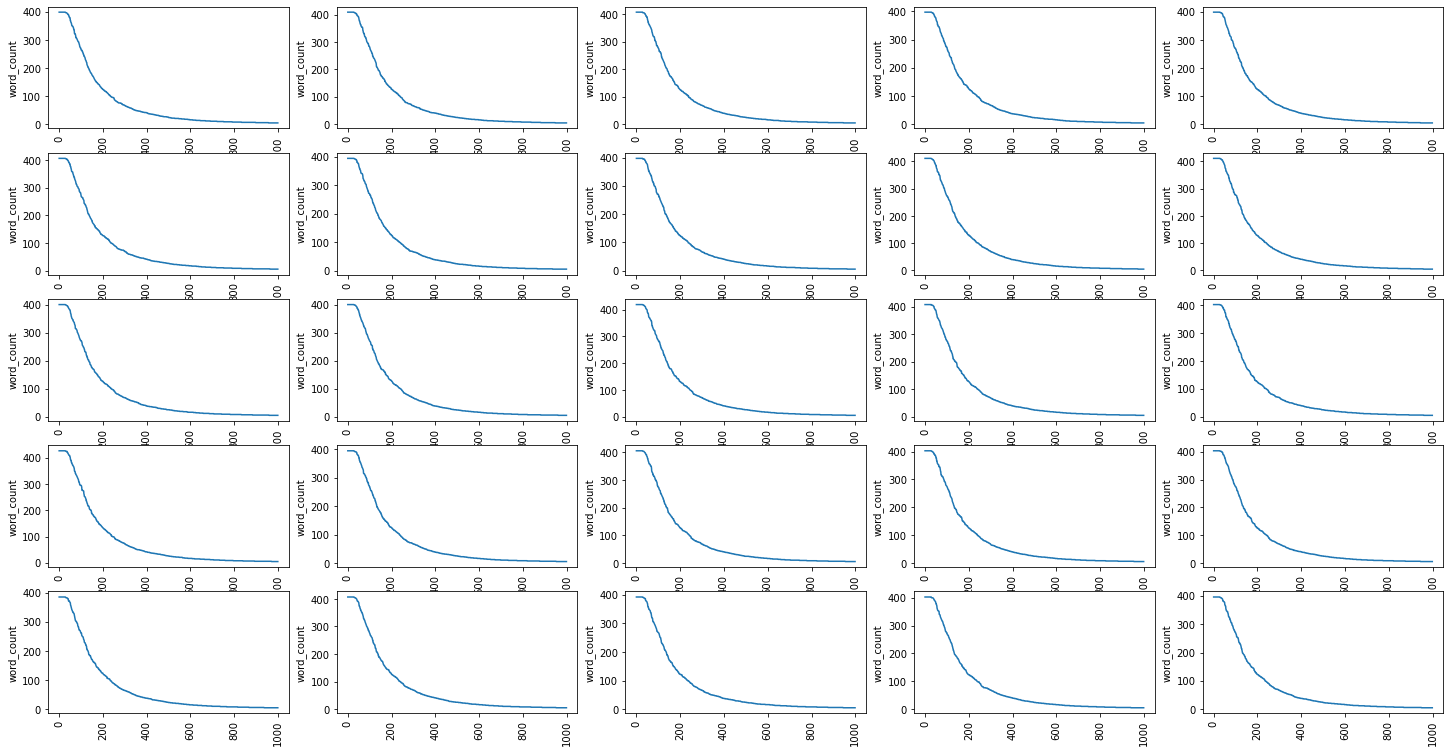

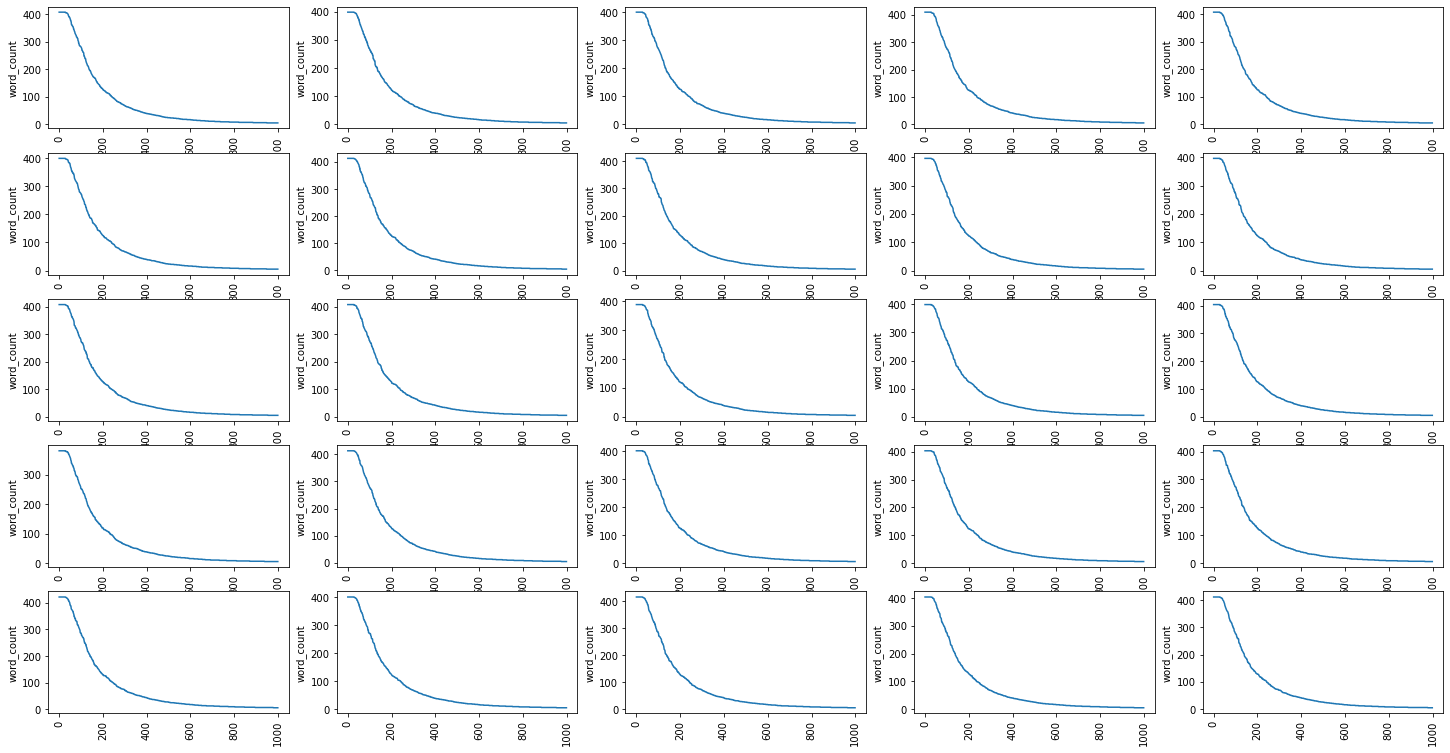

In [24]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.rcParams["figure.figsize"] = (25,13)

word_dict = {}

for i in range(7,9):
    case = f'case{i}'
    g = 1
    for gu in gu_name:
        wc = Counter(word_extract_df.loc[case,gu])
        wc_s = pd.Series(wc)
        wc_s = wc_s.sort_values(ascending = False)[:1000]

        word_dict[case] = wc_s

        plt.subplot(5,5,g)
        plt.ylabel('word_count')
        #plt.title(f'{gu}')
        #plt.bar(wc_s.index,wc_s)
        plt.plot(wc_s.values)
        plt.xticks(rotation=90)
        g += 1
    plt.show()

- 빈출 단어 200개를 이용해 중복된 단어를 지워 word추출을 하려 했지만 200개 단어가 모두 중복되었음

In [35]:
up_word = []

for word in word_dict['case7'][:200].index:
    if word not in word_dict['case8']:
         up_word.append(word)

In [36]:
down_word = []

for word in word_dict['case8'][:200].index:
    if word not in word_dict['case7']:
         down_word.append(word)

In [37]:
up_word

[]

In [38]:
down_word

[]

- 월간 TF-IDF 키워드를 이용해 word추출하기 위한 방법

In [15]:
tf_idf_month = pd.read_pickle('../article/tf_idf_month.pkl')
tf_idf_month = tf_idf_month.transpose()
tf_idf_month

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
취득세,5.863468,5.863468,5.863468,0.000000,0.000000,11.726935,17.590403,23.453871,5.863468,0.000000,...,105.542418,58.634677,58.634677,46.907741,35.180806,93.815483,5.863468,41.044274,29.317338,82.088547
인하,32.997745,60.495866,43.996994,142.990230,60.495866,236.483842,296.979708,379.474071,159.489102,38.497370,...,137.490606,379.474071,21.998497,120.991733,54.996242,60.495866,16.498873,93.493612,71.495115,27.498121
양도세,165.902503,38.710584,77.421168,110.601669,55.300834,82.951251,237.793588,11.060167,71.891085,99.541502,...,38.710584,60.830918,55.300834,149.312253,647.019761,55.300834,165.902503,105.071585,337.335089,685.730345
부담,38.462457,54.946367,49.451730,54.946367,49.451730,43.957093,120.882007,54.946367,38.462457,38.462457,...,115.387370,351.656748,285.721107,142.860554,87.914187,159.344464,362.646021,203.301557,263.742561,153.849827
하반기,21.958696,93.324456,16.469022,109.793478,65.876087,389.766846,592.884780,137.241847,54.896739,54.896739,...,126.262500,120.772826,32.938043,32.938043,38.427717,21.958696,38.427717,76.855434,120.772826,537.988041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
수파,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.797942
열독,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.797942
팔곡,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.797942
서선,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.797942


In [16]:
tf_idf_month_descend = {}

month = 202

for m in range(month):
    month_word_desc = list(tf_idf_month[m].sort_values(ascending = False).index)
    tf_idf_month_descend[m] = month_word_desc

tf_idf_month_descend = pd.DataFrame(tf_idf_month_descend)

In [17]:
tf_idf_month_descend

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,분양,분양,판교,판교,분양,부동산,분양,아파트,판교,분양,...,아파트,분양,주택,주택,주택,아파트,투기,아파트,아파트,아파트
1,아파트,아파트,분양,분양,판교,분양,아파트,분양,분양,아파트,...,억,주택,아파트,아파트,공급,분양,분양,부동산,주택,분양
2,판교,판교,아파트,아파트,아파트,아파트,부동산,판교,아파트,만,...,주택,아파트,분양,분양,아파트,부동산,부동산,분양,분양,주택
3,부동산,주택,만,청약,부동산,만,만,부동산,만,주택,...,서울,억,전세,변창흠,만,주택,주택,주택,부동산,부동산
4,만,재건축,청약,재건축,만,주택,가구,만,부동산,원가,...,분양,건설,건설,부동산,분양,서울,아파트,서울,서울,억
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48915,판주,한라그룹,꺼리,서식지,약장,커밍아웃,팔각정,군위,자정원,기투,...,날치기,김병일,동양인,재용,남북통일,면모,절경,전력투구,타세,베라크루즈
48916,다각도,준수,빈손,소주,시거,革,전이,토사,국악,기과,...,성우기,방일,이지연,급진,면모,기자단,전기세,급속도,남산동,카렌스
48917,퇴직금,대열,몸통,광운,월평균,부기,예심,신영수,사할린,겁니까,...,결핵,탑승교,성석동,京畿,기자단,문창모,전미,임도빈,난티,쏘나타
48918,정규직,군살,민법,강수정,경찰관,광섬유,삼문,경상북도,사아,흥국,...,움막,勝,고등동,해금강,문창모,서완석,요금제,태클,접합,전재준


In [18]:
word_extract_dict_m = {}

for gu in gu_name:
    gu_dict = {}
    for i in range(1,9):
        word_list = []
        case = f'case{i}'
        index_list = case_index_df.loc[gu,case]
        for w in index_list:
            word_list += list(tf_idf_month_descend.iloc[:200,w//4])
        gu_dict[case] = word_list
    word_extract_dict_m[gu] = gu_dict
word_extract_df = pd.DataFrame(word_extract_dict_m)

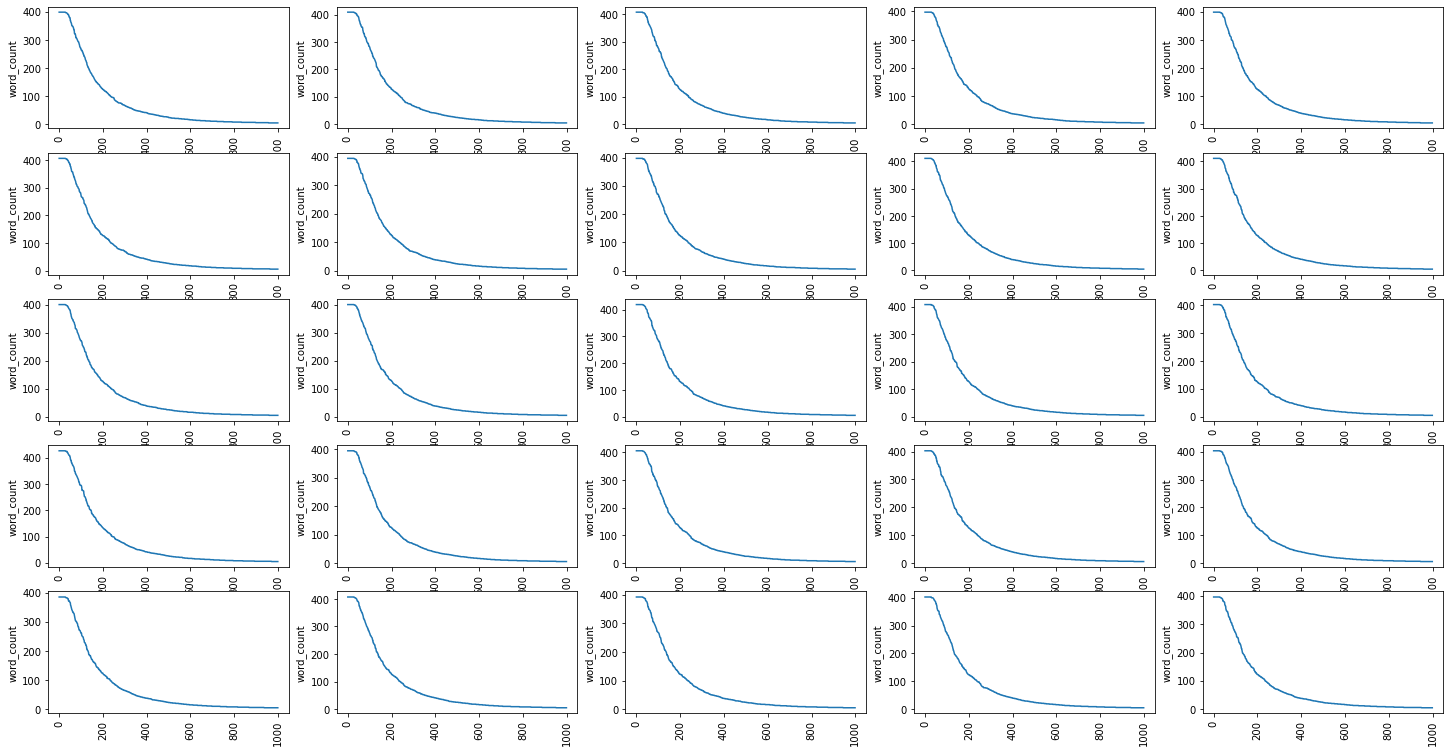

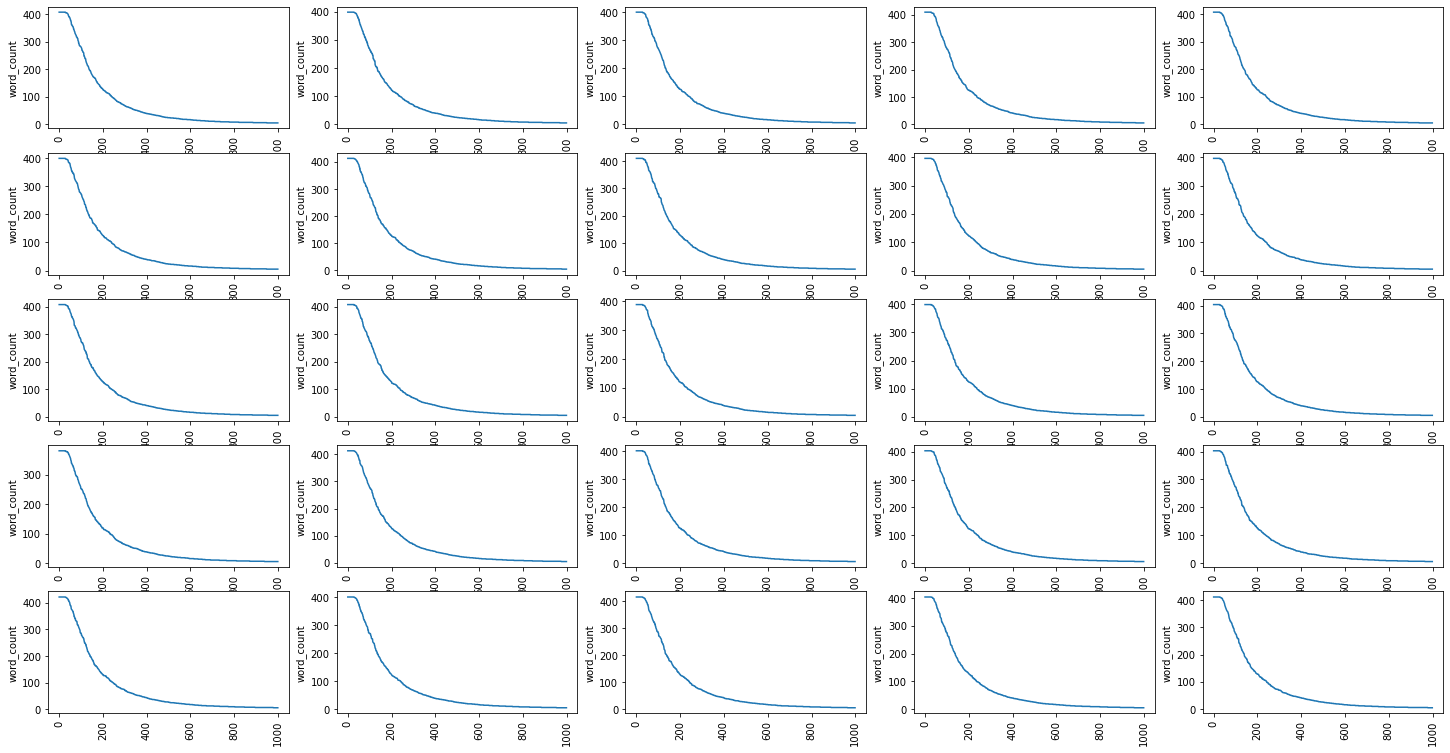

In [23]:
word_dict_m = {}

for i in range(7,9):
    case = f'case{i}'
    g = 1
    for gu in gu_name:
        wc = Counter(word_extract_df.loc[case,gu])
        wc_s = pd.Series(wc)
        wc_s = wc_s.sort_values(ascending = False)[:1000]

        word_dict[case] = wc_s

        plt.subplot(5,5,g)
        plt.ylabel('word_count')
        #plt.title(f'{gu}')
        #plt.bar(wc_s.index,wc_s)
        plt.plot(wc_s.values)
        plt.xticks(rotation=90)
        g += 1
    plt.show()